In [2]:
%reset
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 6.1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.13.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.19.1)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.20.3)" % pd.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
print ("Scikit-Learn version: %6.6s (need at least 0.19.0)" % sklearn.__version__)

from itertools import combinations as cmb

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


IPython version:       7.8.0 (need at least 6.1.0)
Numpy version:        1.17.2 (need at least 1.13.1)
SciPy version:         1.3.1 (need at least 0.19.1)
Pandas version:       0.25.1 (need at least 0.20.3)
Scikit-Learn version: 0.22.1 (need at least 0.19.0)


In [3]:
# Set font sizes
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# import data
relaxed = np.loadtxt('./Relaxed.csv',delimiter=';',usecols=range(8))
neutral = np.loadtxt('./Neutral.csv',delimiter=';',usecols=range(8))
closed = np.loadtxt('./Closed.csv',delimiter=';',usecols=range(8))
openh = np.loadtxt('./Open.csv', delimiter=';',usecols=range(8))
flexion = np.loadtxt('./Flexion.csv',delimiter=';',usecols=range(8))
extension = np.loadtxt('./Extension.csv',delimiter=';',usecols=range(8))
ulnar = np.loadtxt('./Ulnar.csv',delimiter=';',usecols=range(8))
radial = np.loadtxt('./Radial.csv',delimiter=';',usecols=range(8))
pronation = np.loadtxt('./Pronation.csv',delimiter=';',usecols=range(8))
supination = np.loadtxt('./Supination.csv',delimiter=';',usecols=range(8))
thumbsup = np.loadtxt('./Thumbsup.csv', delimiter=';',usecols=range(8))
thumbsdown = np.loadtxt('./Thumbsdown.csv', delimiter=';',usecols=range(8))
thumbflat = np.loadtxt('./ThumbFlat.csv',delimiter=';',usecols=range(8))
indexpinch = np.loadtxt('./IndexPinch.csv', delimiter=';',usecols=range(8))
middlepinch = np.loadtxt('./MiddlePinch.csv', delimiter=';',usecols=range(8))
ringpinch = np.loadtxt('./RingPinch.csv', delimiter=';',usecols=range(8))
pinkypinch = np.loadtxt('./PinkyPinch.csv', delimiter=';',usecols=range(8))

flexionfist = np.loadtxt('./FlexionFist.csv',delimiter=';',usecols=range(8))
extensionfist = np.loadtxt('./ExtensionFist.csv',delimiter=';',usecols=range(8))
ulnarfist = np.loadtxt('./UlnarFist.csv',delimiter=';',usecols=range(8))
radialfist = np.loadtxt('./RadialFist.csv', delimiter=';',usecols=range(8))
pronationfist = np.loadtxt('./PronationFist.csv',delimiter=';',usecols=range(8))
supinationfist = np.loadtxt('./SupinationFist.csv',delimiter=';',usecols=range(8))
indexpoint = np.loadtxt('./IndexPoint.csv',delimiter=';',usecols=range(8))
middlepoint = np.loadtxt('./MiddlePoint.csv',delimiter=';',usecols=range(8))
ringpoint = np.loadtxt('./RingPoint.csv',delimiter=';',usecols=range(8))
pinkypoint = np.loadtxt('./PinkyPoint.csv', delimiter=';',usecols=range(8))
fingerspread = np.loadtxt('./FingerSpread.csv', delimiter=';',usecols=range(8))
fingergun = np.loadtxt('./FingerGun.csv', delimiter=';',usecols=range(8))
peace = np.loadtxt('./Peace.csv', delimiter=';',usecols=range(8))
spiderman = np.loadtxt('./Spiderman.csv', delimiter=';',usecols=range(8))
spock = np.loadtxt('./Spock.csv', delimiter=';',usecols=range(8))

# Combine data into navigable structure
full_dset = [relaxed, neutral, closed, openh, 
             flexion, extension, ulnar, radial, 
             pronation, supination, thumbsup, thumbsdown, 
             thumbflat, indexpinch, middlepinch, ringpinch, 
             pinkypinch, flexionfist, extensionfist, ulnarfist, 
             radialfist, pronationfist, supinationfist, indexpoint, 
             middlepoint, ringpoint, pinkypoint, fingerspread, 
             fingergun, peace, spiderman, spock]

labels = ["relaxed","neutral","closed","open",
          "flexion","extension","ulnar","radial",
          "pronation","supination","thumbs up","thumbs down",
          "thumb flat","index pinch","middle pinch","ring pinch",
          "pinky pinch","flexion fist","extension fist","ulnar fist",
          "radial fist","pronation fist","supination fist","index point",
          "middle point","ring point","pinky point","finger spread",
          "finger gun","peace","spiderman","spock"]

n_classes = len(full_dset)

In [5]:
# Calculates RMS's of 250ms chunks (for all channels, single class)
def rms(data):
    output = np.zeros((8,120))
    for i in range(8):
        for j in range(120):
            low = j * 50
            high = low + 50
            output[i,j] = np.sqrt(np.mean(data[low:high,i]**2))
    return output

In [6]:
# Perform RMS calculation
rms_t = np.empty((8,0))
rms_v = np.empty((8,0))
for i,dset in enumerate(full_dset):
    rmss = rms(dset)
    rms_t = np.append(rms_t,rmss[:,:int(len(rmss[0])*0.25)],axis=1)
    rms_v = np.append(rms_v,rmss[:,int(len(rmss[0])*0.25):],axis=1)

In [7]:
def lda_format(rms_set):
    # Reformat data for LDA classifier
    classes = np.empty((1,0))
    n_samples = int(len(rms_set[0])/n_classes)
    for i in range(n_classes):
        classes = np.append(classes,np.full((1,n_samples),int(i)),axis=1)
    zipped = np.concatenate((rms_set,classes),axis=0)    
    zipped = np.swapaxes(zipped,0,1)
    np.random.shuffle(zipped)
    data = zipped[:,:-1]
    classes = np.ravel(zipped[:,-1:])
    return(data,classes)

In [8]:
# Format Data
data_t,classes_t = lda_format(rms_t)
data_v,classes_v = lda_format(rms_v)

# Perform LDA fit
lda = LDA()
lda.fit(data_t, classes_t)

# Perform QDA fit
qda = QDA()
qda.fit(data_t, classes_t)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [9]:
# Function for evaluating LDA success
def lda_eval(lda, v_data, v_classes):
    pred = lda.predict(v_data)
    num_correct = 0
    misses = []
    for i,p in enumerate(pred):
        if v_classes[i] == p:
            num_correct += 1
        else:
            misses.append((v_classes[i],p))
    pos_rate = num_correct/len(v_classes)
    return (pred,pos_rate,misses)
    
pred,rate,misses = lda_eval(lda, data_v, classes_v)
print('True Positive Rate: '+str(rate))

True Positive Rate: 0.93125


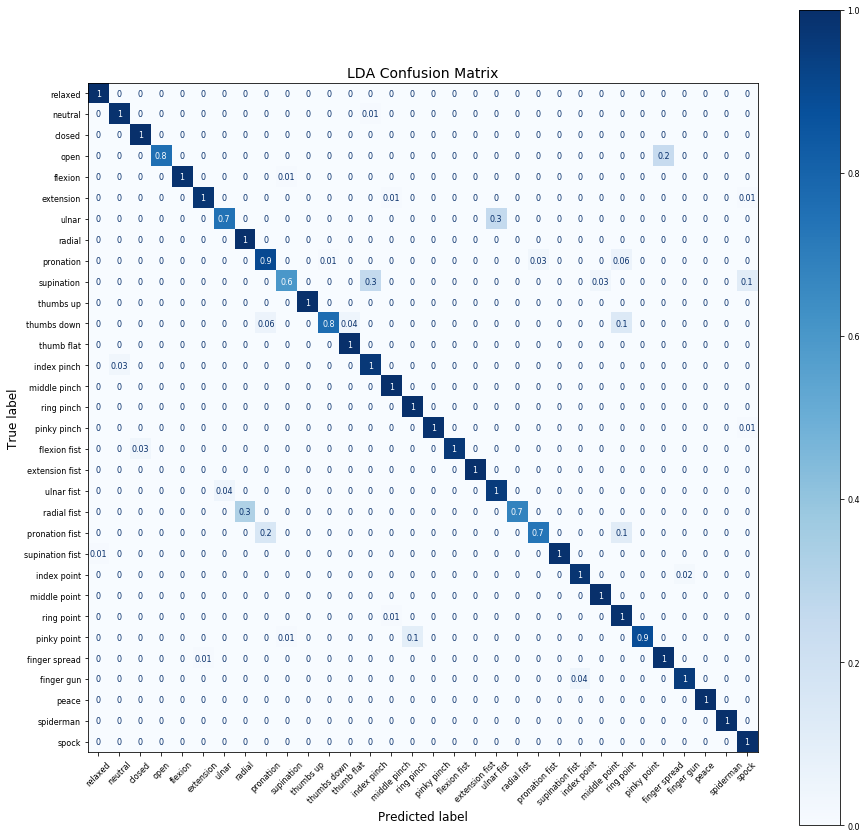

In [18]:
fig, a = plt.subplots(1, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title("LDA Confusion Matrix",fontdict={'fontsize': 14})
sklearn.metrics.plot_confusion_matrix(lda,data_v,classes_v,
                                      xticks_rotation=45,
                                      values_format='0.1g',
                                      cmap=plt.cm.Blues,
                                      normalize='true',
                                      ax=a,
                                      display_labels=labels)

plt.savefig('32-Pose LDA Confusion Matrix.pdf',bbox_inches='tight')

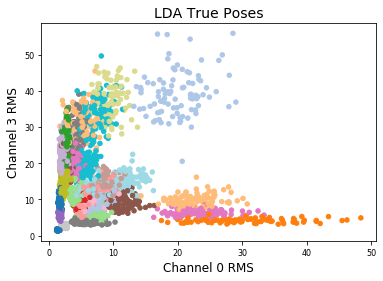

In [19]:
plt.title("LDA True Poses",fontdict={'fontsize': 14})
plt.xlabel("Channel 0 RMS",fontdict={'fontsize': 12})
plt.ylabel("Channel 3 RMS",fontdict={'fontsize': 12})
plt.scatter(data_v[:,0], data_v[:,3], c=classes_v, s=20, cmap='tab20')
plt.savefig("32-Pose LDA True Classes Scatter.pdf")

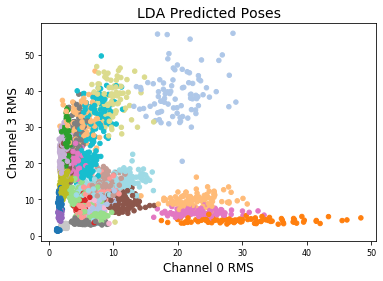

In [20]:
plt.title("LDA Predicted Poses",fontdict={'fontsize': 14})
plt.xlabel("Channel 0 RMS",fontdict={'fontsize': 12})
plt.ylabel("Channel 3 RMS",fontdict={'fontsize': 12})
plt.scatter(data_v[:,0], data_v[:,3], c=pred, s=20, cmap='tab20')
plt.savefig("32-Pose LDA Predicted Classes Scatter.pdf")

In [21]:
# Function for evaluating QDA success
def qda_eval(qda, v_data, v_classes):
    pred = qda.predict(v_data)
    num_correct = 0
    misses = []
    for i,p in enumerate(pred):
        if v_classes[i] == p:
            num_correct += 1
        else:
            misses.append((v_classes[i],p))
    pos_rate = num_correct/len(v_classes)
    return (pred,pos_rate,misses)
    
pred,rate,misses = qda_eval(qda, data_v, classes_v)
print('True Positive Rate: '+str(rate))

0.9708333333333333
[(22.0, 21.0), (23.0, 28.0), (23.0, 28.0), (21.0, 8.0), (21.0, 8.0), (16.0, 23.0), (21.0, 8.0), (21.0, 8.0), (3.0, 27.0), (21.0, 8.0), (11.0, 21.0), (21.0, 8.0), (21.0, 8.0), (28.0, 23.0), (21.0, 8.0), (20.0, 7.0), (22.0, 20.0), (21.0, 8.0), (22.0, 31.0), (11.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (22.0, 31.0), (31.0, 21.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (26.0, 15.0), (21.0, 8.0), (21.0, 8.0), (3.0, 27.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (16.0, 23.0), (21.0, 8.0), (16.0, 23.0), (21.0, 8.0), (21.0, 8.0), (19.0, 6.0), (26.0, 15.0), (23.0, 28.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (11.0, 21.0), (22.0, 21.0), (22.0, 31.0), (26.0, 15.0), (26.0, 15.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (11.0, 8.0), (21.0, 8.0), (13.0, 31.0), (21.0, 8.0), (16.0, 23.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (21.0, 8.0), (22.0, 27.0), (26.0, 15.0), (22.0, 21.0), (21.0, 11.0), (21.0, 8.0), (21.0

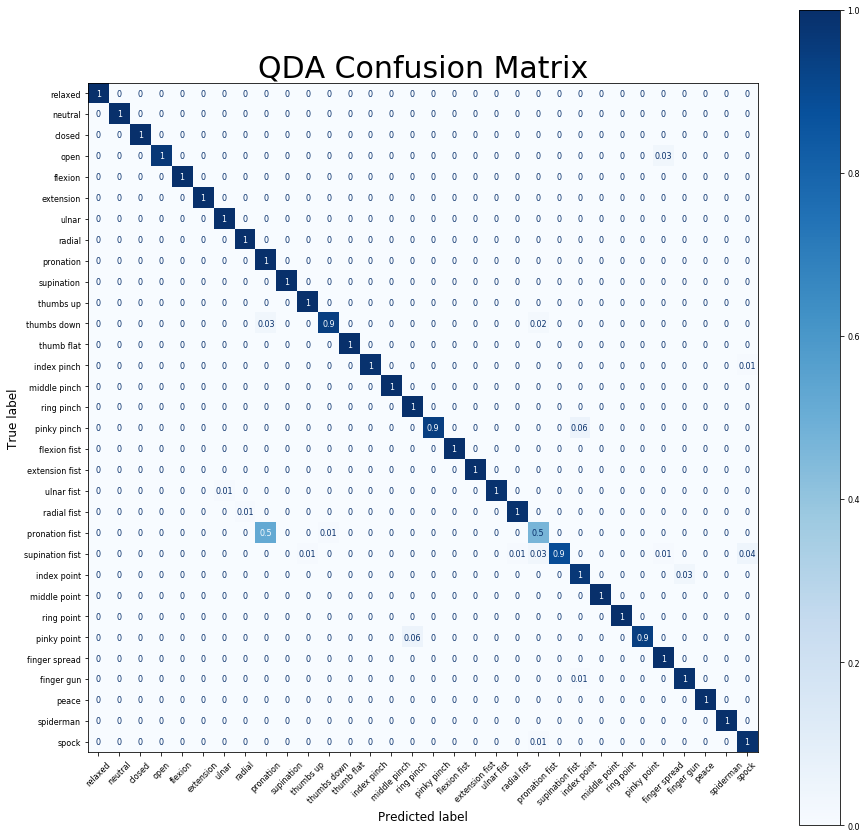

In [22]:
fig, a = plt.subplots(1, 1)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.title("QDA Confusion Matrix",fontdict={'fontsize': 30})
sklearn.metrics.plot_confusion_matrix(qda,data_v,classes_v,
                                      xticks_rotation=45,
                                      values_format='0.1g',
                                      cmap=plt.cm.Blues,
                                      normalize='true',
                                      ax=a,
                                      display_labels=labels)